# Data Preprocessing - Bag of Words - Big Richard Club

#### Imports

In [118]:
import pandas as pd
import numpy as np

import re 
import nltk 
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
import collections

import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

# I. Import Data

In [119]:
df_train = pd.read_csv('data/Corona_NLP_train.csv' , encoding = 'latin_1')
df_val = pd.read_csv('data/Corona_NLP_test.csv' , encoding = 'latin_1')

In [120]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [121]:
df_val.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [122]:
training = df_train[['OriginalTweet', 'Sentiment']]
validation = df_val[['OriginalTweet', 'Sentiment']]

## A) Descriptive Statistics

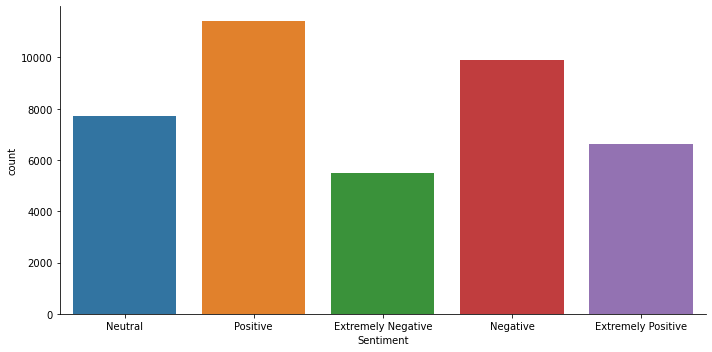

In [123]:
sns.catplot(x = 'Sentiment', kind = 'count', data = training, height = 5, aspect = 2)

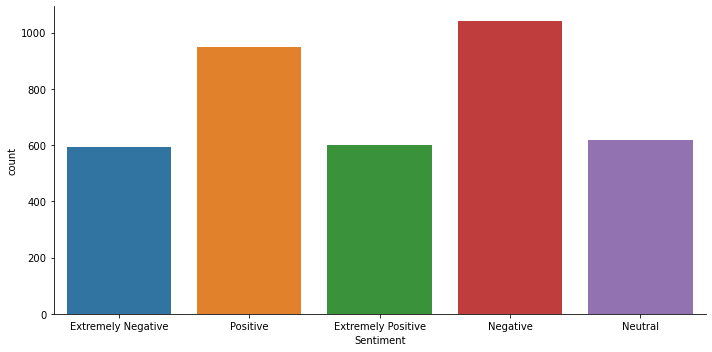

In [124]:
sns.catplot(x = 'Sentiment', kind = 'count', data = validation, height = 5, aspect = 2)

## B) Checking for Missing Values 

In [125]:
training.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [126]:
validation.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

## C) Renaming Columns and Reducing the Amount of Classes

In [127]:
training.rename({
    "OriginalTweet": "text",
    "Sentiment": "label"
}, axis="columns", inplace=True)

validation.rename({
    "OriginalTweet": "text",
    "Sentiment": "label"
}, axis="columns", inplace=True)

#### From 5 classes to 3

In [128]:
def classes_def(x):
    '''
    Makes the label variable have 3 classes instead of 5
    '''
    
    if x ==  "Extremely Positive":
        return "2"
    elif x == "Extremely Negative":
        return "0"
    elif x == "Negative":
        return "0"
    elif x ==  "Positive":
        return "2"
    else:
        return "1"

training['label'] = training['label'].apply(lambda x:classes_def(x))
validation['label'] = validation['label'].apply(lambda x:classes_def(x))

training.label.value_counts(normalize= True)

2    0.438467
0    0.374128
1    0.187404
Name: label, dtype: float64

# II. Data Cleaning

In [67]:
def tokenize_sentence(df, colname):
    df[colname] = df[colname].str.split()
    return df

In [69]:
def remove_stop_words(df, colname):
    stop_words = stopwords.words('english')
    df[colname] = df[colname].apply(lambda x: [word for word in x if word not in stop_words])
    return df

In [71]:
def reverse_tokenize_sentence(df, colname):
    df[colname] = df[colname].map(lambda word: ' '.join(word))
    return df

In [129]:
def big_removal(df, column):
    """
    Takes in a string of text, lowercases it and removes the following elements:
    1. URLs
    2. Mentions "@" and Usernames
    3. HTML
    4. Numbers
    5. Punctuation
    6. Hashtags
    Optional : 7. Extra Space
    """
    
    df[column] = df[column].str.lower()
    
    for i in range(len(df)):
        df[column][i] = re.sub(r'https?://\S+|www\.\S+', "", df[column][i]) # urls
        df[column][i] = re.sub(r"@\w+", "", df[column][i]) # mentions
        df[column][i] = re.sub(r"<.*?>", "", df[column][i]) # html
        df[column][i] = re.sub(r"\d+", "", df[column][i]) # numbers
        df[column][i] = re.sub(r"[^\w\s\d]", "", df[column][i]) # punctuation
        df[column][i] = re.sub(r"#\w+", "", df[column][i]) # hashtags
        #df[column][i] = re.sub(r"\s+", "", df[column][i]) # extra space
    
    return df

In [145]:
def text_cleaning(df, colname):
    """
    Takes in a string of text, then performs the following:
    1. Tokenize sentences
    2. Remove all stopwords
    3. convert tokenized text to text
    """
    
    df = (
        df
        .pipe(tokenize_sentence, colname)
        .pipe(remove_stop_words, colname)
        .pipe(reverse_tokenize_sentence, colname)
    )
    
    return df

In [148]:
big_removal(training, "text")

,text,label
0,,1
1,advice talk neighbours family exchange phone n...,2
2,coronavirus australia woolworths give elderly ...,2
3,food stock one empty please dont panic enough ...,2
4,ready go supermarket covid outbreak im paranoi...,0
...,...,...
41152,airline pilots offering stock supermarket shel...,1
41153,response complaint provided citing covid relat...,0
41154,you know itâs getting tough rationing toilet ...,2
41155,is wrong smell hand sanitizer starting turn on...,1


In [149]:
text_cleaning(training, "text")

,text,label
0,,1
1,advice talk neighbours family exchange phone n...,2
2,coronavirus australia woolworths give elderly ...,2
3,food stock one empty please dont panic enough ...,2
4,ready go supermarket covid outbreak im paranoi...,0
...,...,...
41152,airline pilots offering stock supermarket shel...,1
41153,response complaint provided citing covid relat...,0
41154,know itâs getting tough rationing toilet paper...,2
41155,wrong smell hand sanitizer starting turn coron...,1


# III. Bag of Words Representation

In [150]:
x_train = training['text']
y_train = training['label']

x_val = validation['text']
y_val = validation['label']

In [151]:
y_val_array = np.asarray(y_val.values).astype("float")
y_val_array

# RUN ONLY ONCE
# np.savetxt("data/y_val.txt.gz", y_val_array) # Save into a file / .gz compresses the file

array([0., 2., 2., ..., 1., 0., 2.])

In [152]:
y_train_array = np.asarray(y_train.values).astype("float")
y_train_array

# RUN ONLY ONCE
# np.savetxt("data/y_train.txt.gz", y_train_array) # Save into a file / .gz compresses the file

array([1., 2., 2., ..., 2., 1., 0.])

## A) Vocabulary

In [26]:
vocabulary = collections.Counter()
len_x_train = len(x_train)

for i in range(len_x_train):
    words = x_train[i]    
    vocabulary.update(words)

# RUN ONLY ONCE
    
# Save vocabulary in "lesser_vocabulary.txt" file
#f = open("data/lesser_vocabulary.txt", "w", encoding="utf-8")

#for word, count in vocabulary.most_common(1000): # 1000 most common words
#    print(word, file=f)
#f.close()

In [27]:
def load_vocabulary(filename):
    f = open(filename, encoding="utf-8")
    text = f.read()
    f.close()
    words = text.split()
    
    # Create index for each word
    voc = {}
    index = 0
    for word in words:
        voc[word] = index
        index += 1
    
    return voc

In [28]:
vocabulary = load_vocabulary("data/lesser_vocabulary.txt")
list(vocabulary.items())[:5]

[('covid', 0),
 ('coronavirus', 1),
 ('prices', 2),
 ('food', 3),
 ('supermarket', 4)]

## B) Tweets as a Bags of Words

#### Example of a BoW for the 3rd comment

In [29]:
x_train[2]

['coronavirus',
 'australia',
 'woolworths',
 'give',
 'elderly',
 'disabled',
 'dedicated',
 'shopping',
 'hours',
 'amid',
 'covid',
 'outbreak']

In [42]:
words = x_train[2]
    
bow = np.zeros(len(vocabulary))
for word in words:
    if word in vocabulary:
        index = vocabulary[word]
        bow[index] += 1
        
bow[:50]

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### All Tweets as Bags of Words

In [31]:
def read_comment_bow(comment, voc):
    words = x_train[comment]
    
    # Bag of Words
    bow = np.zeros(len(voc))
    for word in words:
        if word in voc:
            index = voc[word]
            bow[index] += 1

    return bow

#### Training Data

In [32]:
comments = []

for i in range(len(x_train)):
    bow = read_comment_bow(comment=i, voc=vocabulary)
    
    comments.append(bow)

x_train_bow = np.stack(comments)

# RUN ONLY ONCE
# np.savetxt("data/lesser_x_train_bow.txt.gz", x_train_bow) # Save into a file / .gz compresses the file

#### Testing Data

In [33]:
val_comments = []

for i in range(len(x_val)):
    val_bow = read_comment_bow(comment=i, voc=vocabulary)
    
    val_comments.append(val_bow)

x_val_bow = np.stack(val_comments)

# RUN ONLY ONCE
# np.savetxt("data/lesser_x_val_bow.txt.gz", x_val_bow) # Save into a file / .gz compresses the file